In [70]:
import pandas as pd

from sklearn import linear_model


from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# https://www.kaggle.com/c/boston-housing
df = pd.read_csv('http://bit.ly/boston_housing_csv')

In [12]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [14]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [15]:
df['medv_level'] = pd.qcut(df['medv'], 3, labels=False)

In [18]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,medv_level
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,2
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,2
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,2
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,2


In [19]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,medv_level
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,1
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,1
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,2
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,1
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9,0


In [20]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,medv_level
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.994071
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.814451
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,1.000000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,2.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,2.000000


In [21]:
df.query('rm < 5')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,medv_level
144,2.77974,0.0,19.58,0,0.871,4.903,97.8,1.3459,5,403,14.7,396.90,29.29,11.8,0
147,2.36862,0.0,19.58,0,0.871,4.926,95.7,1.4608,5,403,14.7,391.71,29.53,14.6,0
310,2.63548,0.0,9.90,0,0.544,4.973,37.8,2.5194,4,304,18.4,350.45,12.64,16.1,0
365,4.55587,0.0,18.10,0,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12,27.5,2
366,3.69695,0.0,18.10,0,0.718,4.963,91.4,1.7523,24,666,20.2,316.03,14.00,21.9,1
367,13.52220,0.0,18.10,0,0.631,3.863,100.0,1.5106,24,666,20.2,131.42,13.33,23.1,1
368,4.89822,0.0,18.10,0,0.631,4.970,100.0,1.3325,24,666,20.2,375.52,3.26,50.0,2
373,11.10810,0.0,18.10,0,0.668,4.906,100.0,1.1742,24,666,20.2,396.90,34.77,13.8,0
374,18.49820,0.0,18.10,0,0.668,4.138,100.0,1.1370,24,666,20.2,396.90,37.97,13.8,0
384,20.08490,0.0,18.10,0,0.700,4.368,91.2,1.4395,24,666,20.2,285.83,30.63,8.8,0


In [23]:
df.query('rm < 5')[['rm','age','medv']]

,rm,age,medv
144,4.903,97.8,11.8
147,4.926,95.7,14.6
310,4.973,37.8,16.1
365,3.561,87.9,27.5
366,4.963,91.4,21.9
367,3.863,100.0,23.1
368,4.970,100.0,50.0
373,4.906,100.0,13.8
374,4.138,100.0,13.8
384,4.368,91.2,8.8


In [25]:
df.query('rm < 5')[['rm','age','medv']].sort_values('medv', ascending=False)

,rm,age,medv
368,4.970,100.0,50.0
365,3.561,87.9,27.5
367,3.863,100.0,23.1
366,4.963,91.4,21.9
412,4.628,100.0,17.9
310,4.973,37.8,16.1
147,4.926,95.7,14.6
373,4.906,100.0,13.8
374,4.138,100.0,13.8
406,4.138,100.0,11.9


In [29]:
df.query('rm < 5 and age == 100')[['rm','age','medv']].sort_values('medv', ascending=False)

,rm,age,medv
368,4.970,100.0,50.0
367,3.863,100.0,23.1
412,4.628,100.0,17.9
373,4.906,100.0,13.8
374,4.138,100.0,13.8
406,4.138,100.0,11.9
386,4.652,100.0,10.5
388,4.880,100.0,10.2
414,4.519,100.0,7.0


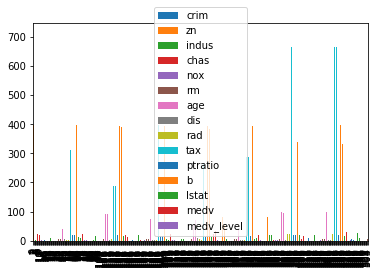

In [42]:
df.plot.bar()

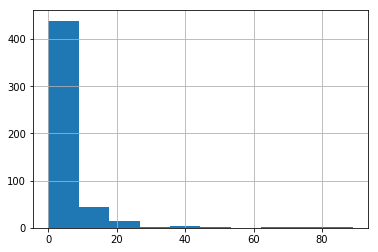

In [34]:
df.crim.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23769a58>,
      dtype=object)

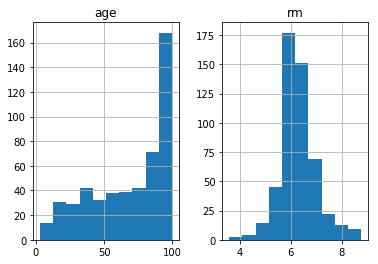

In [35]:
df[['rm','age']].hist()

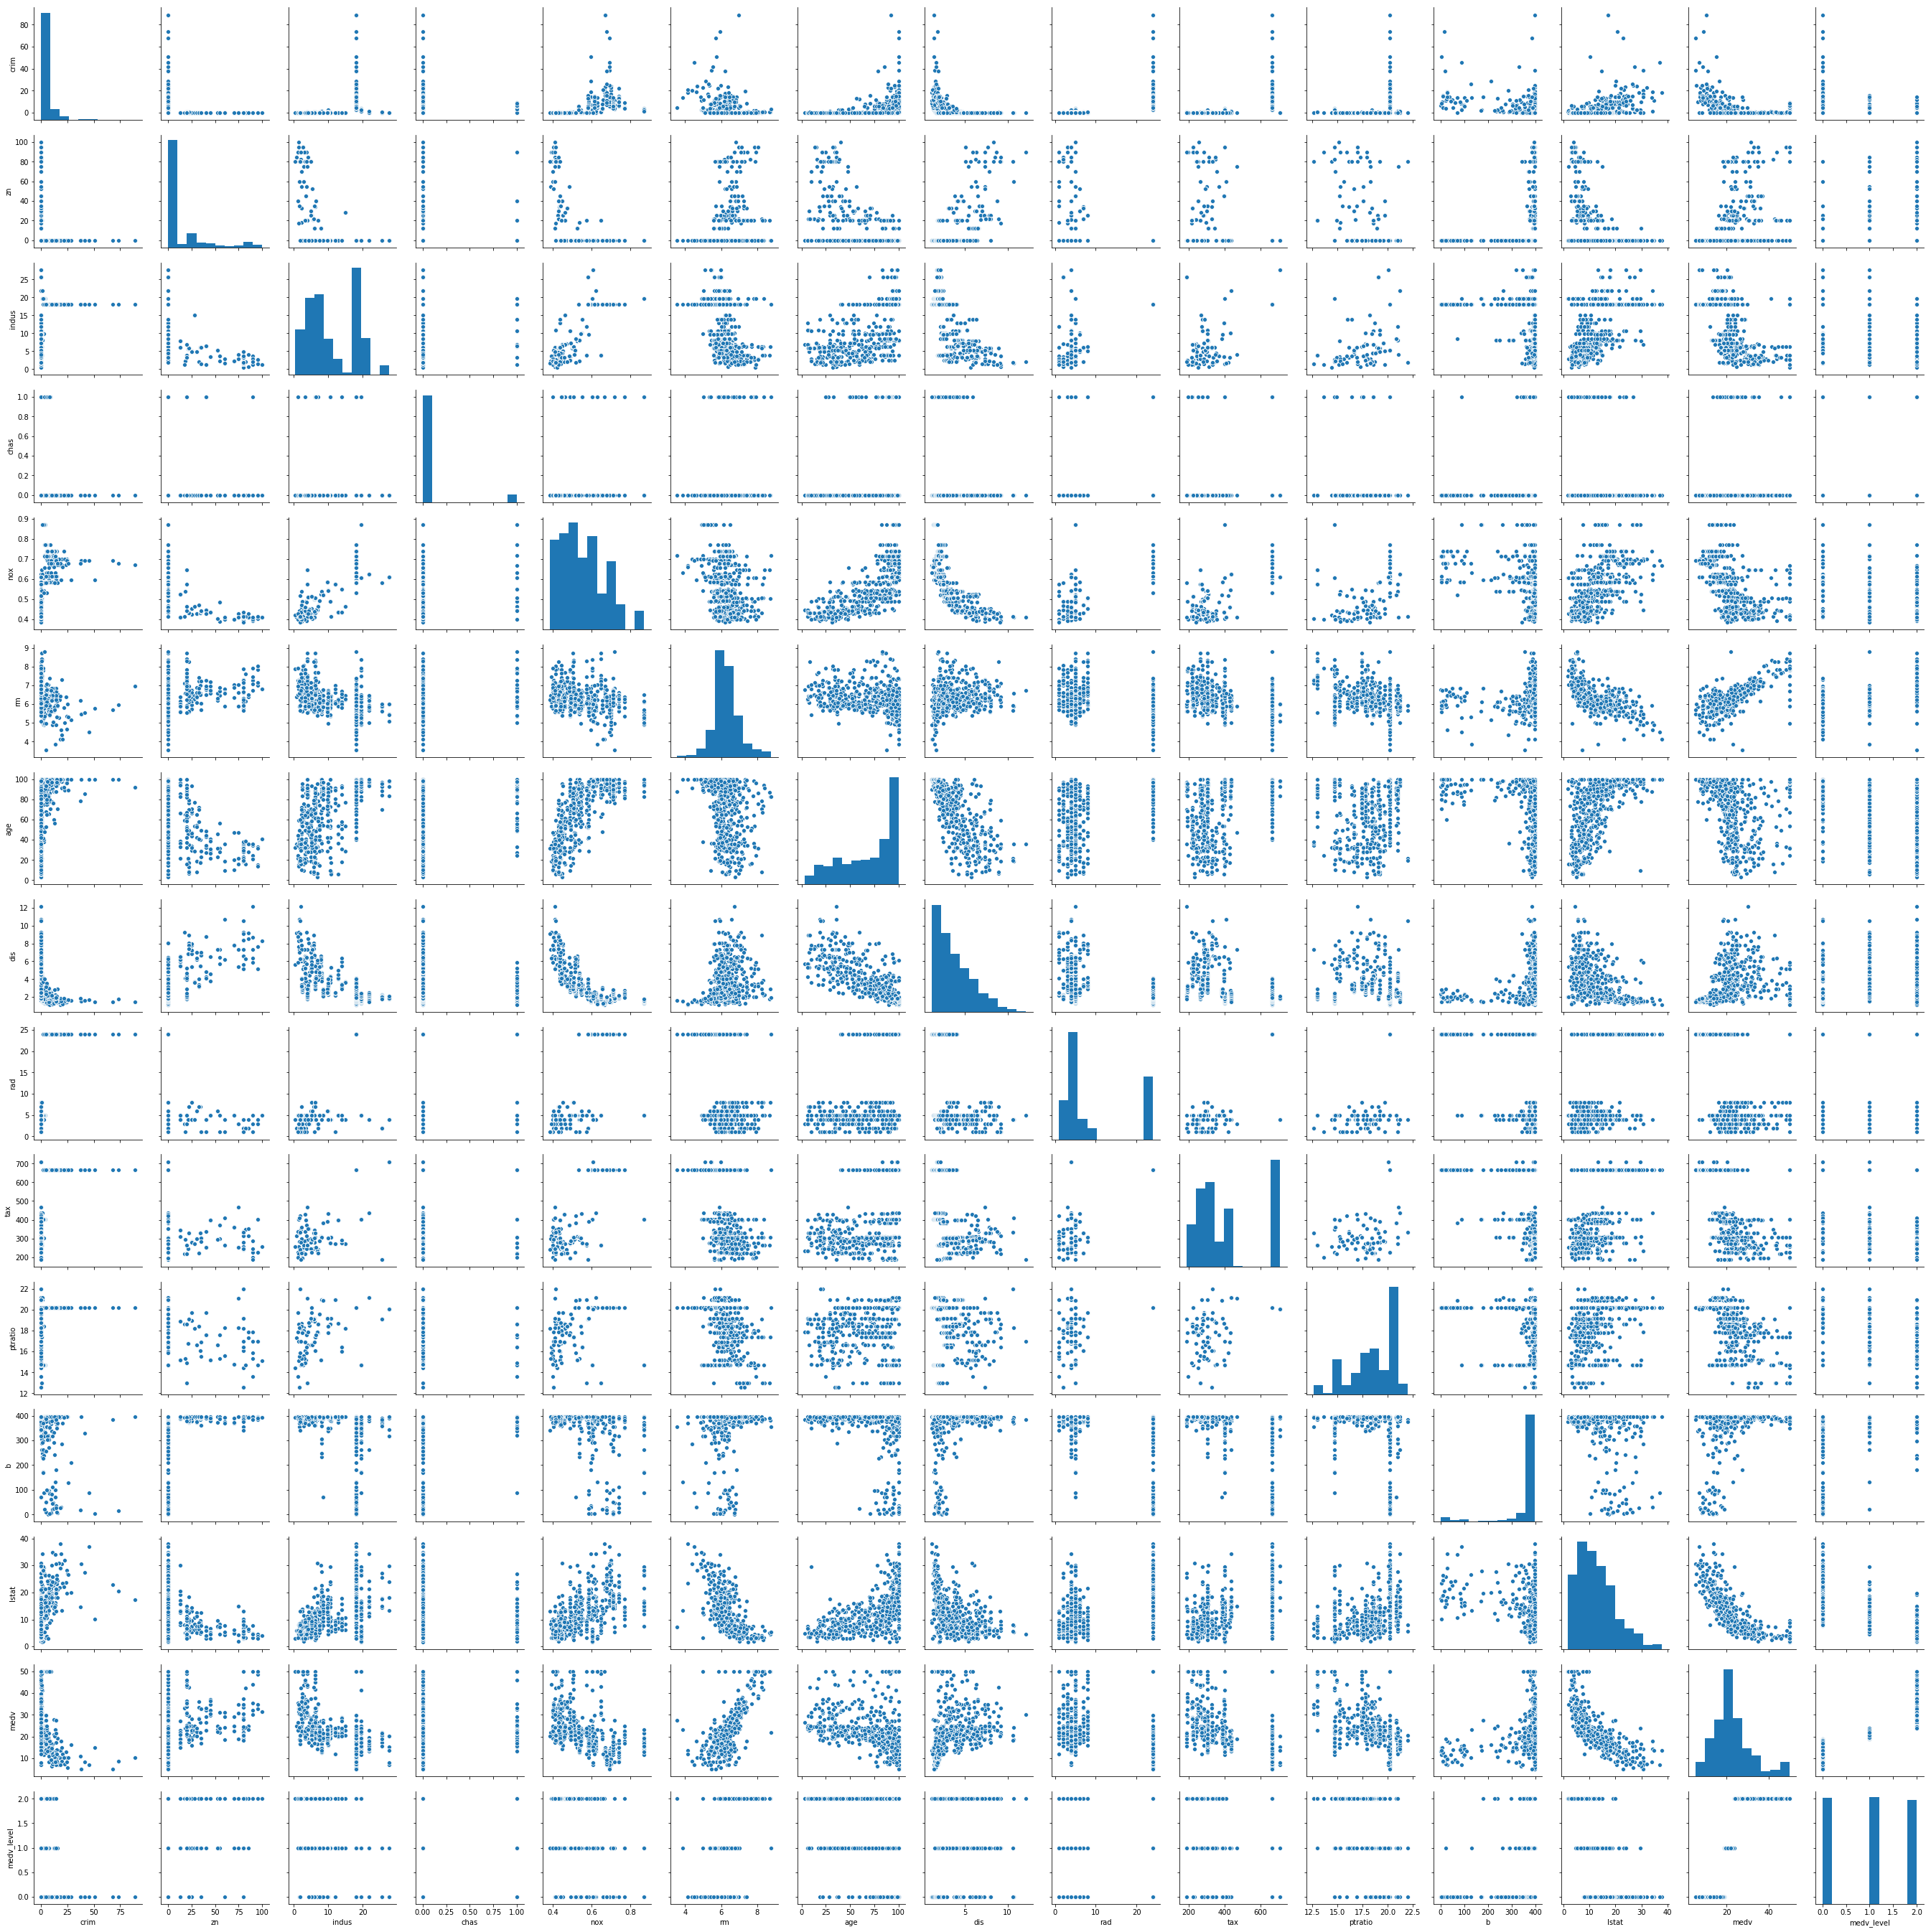

In [36]:
sns.pairplot(df)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


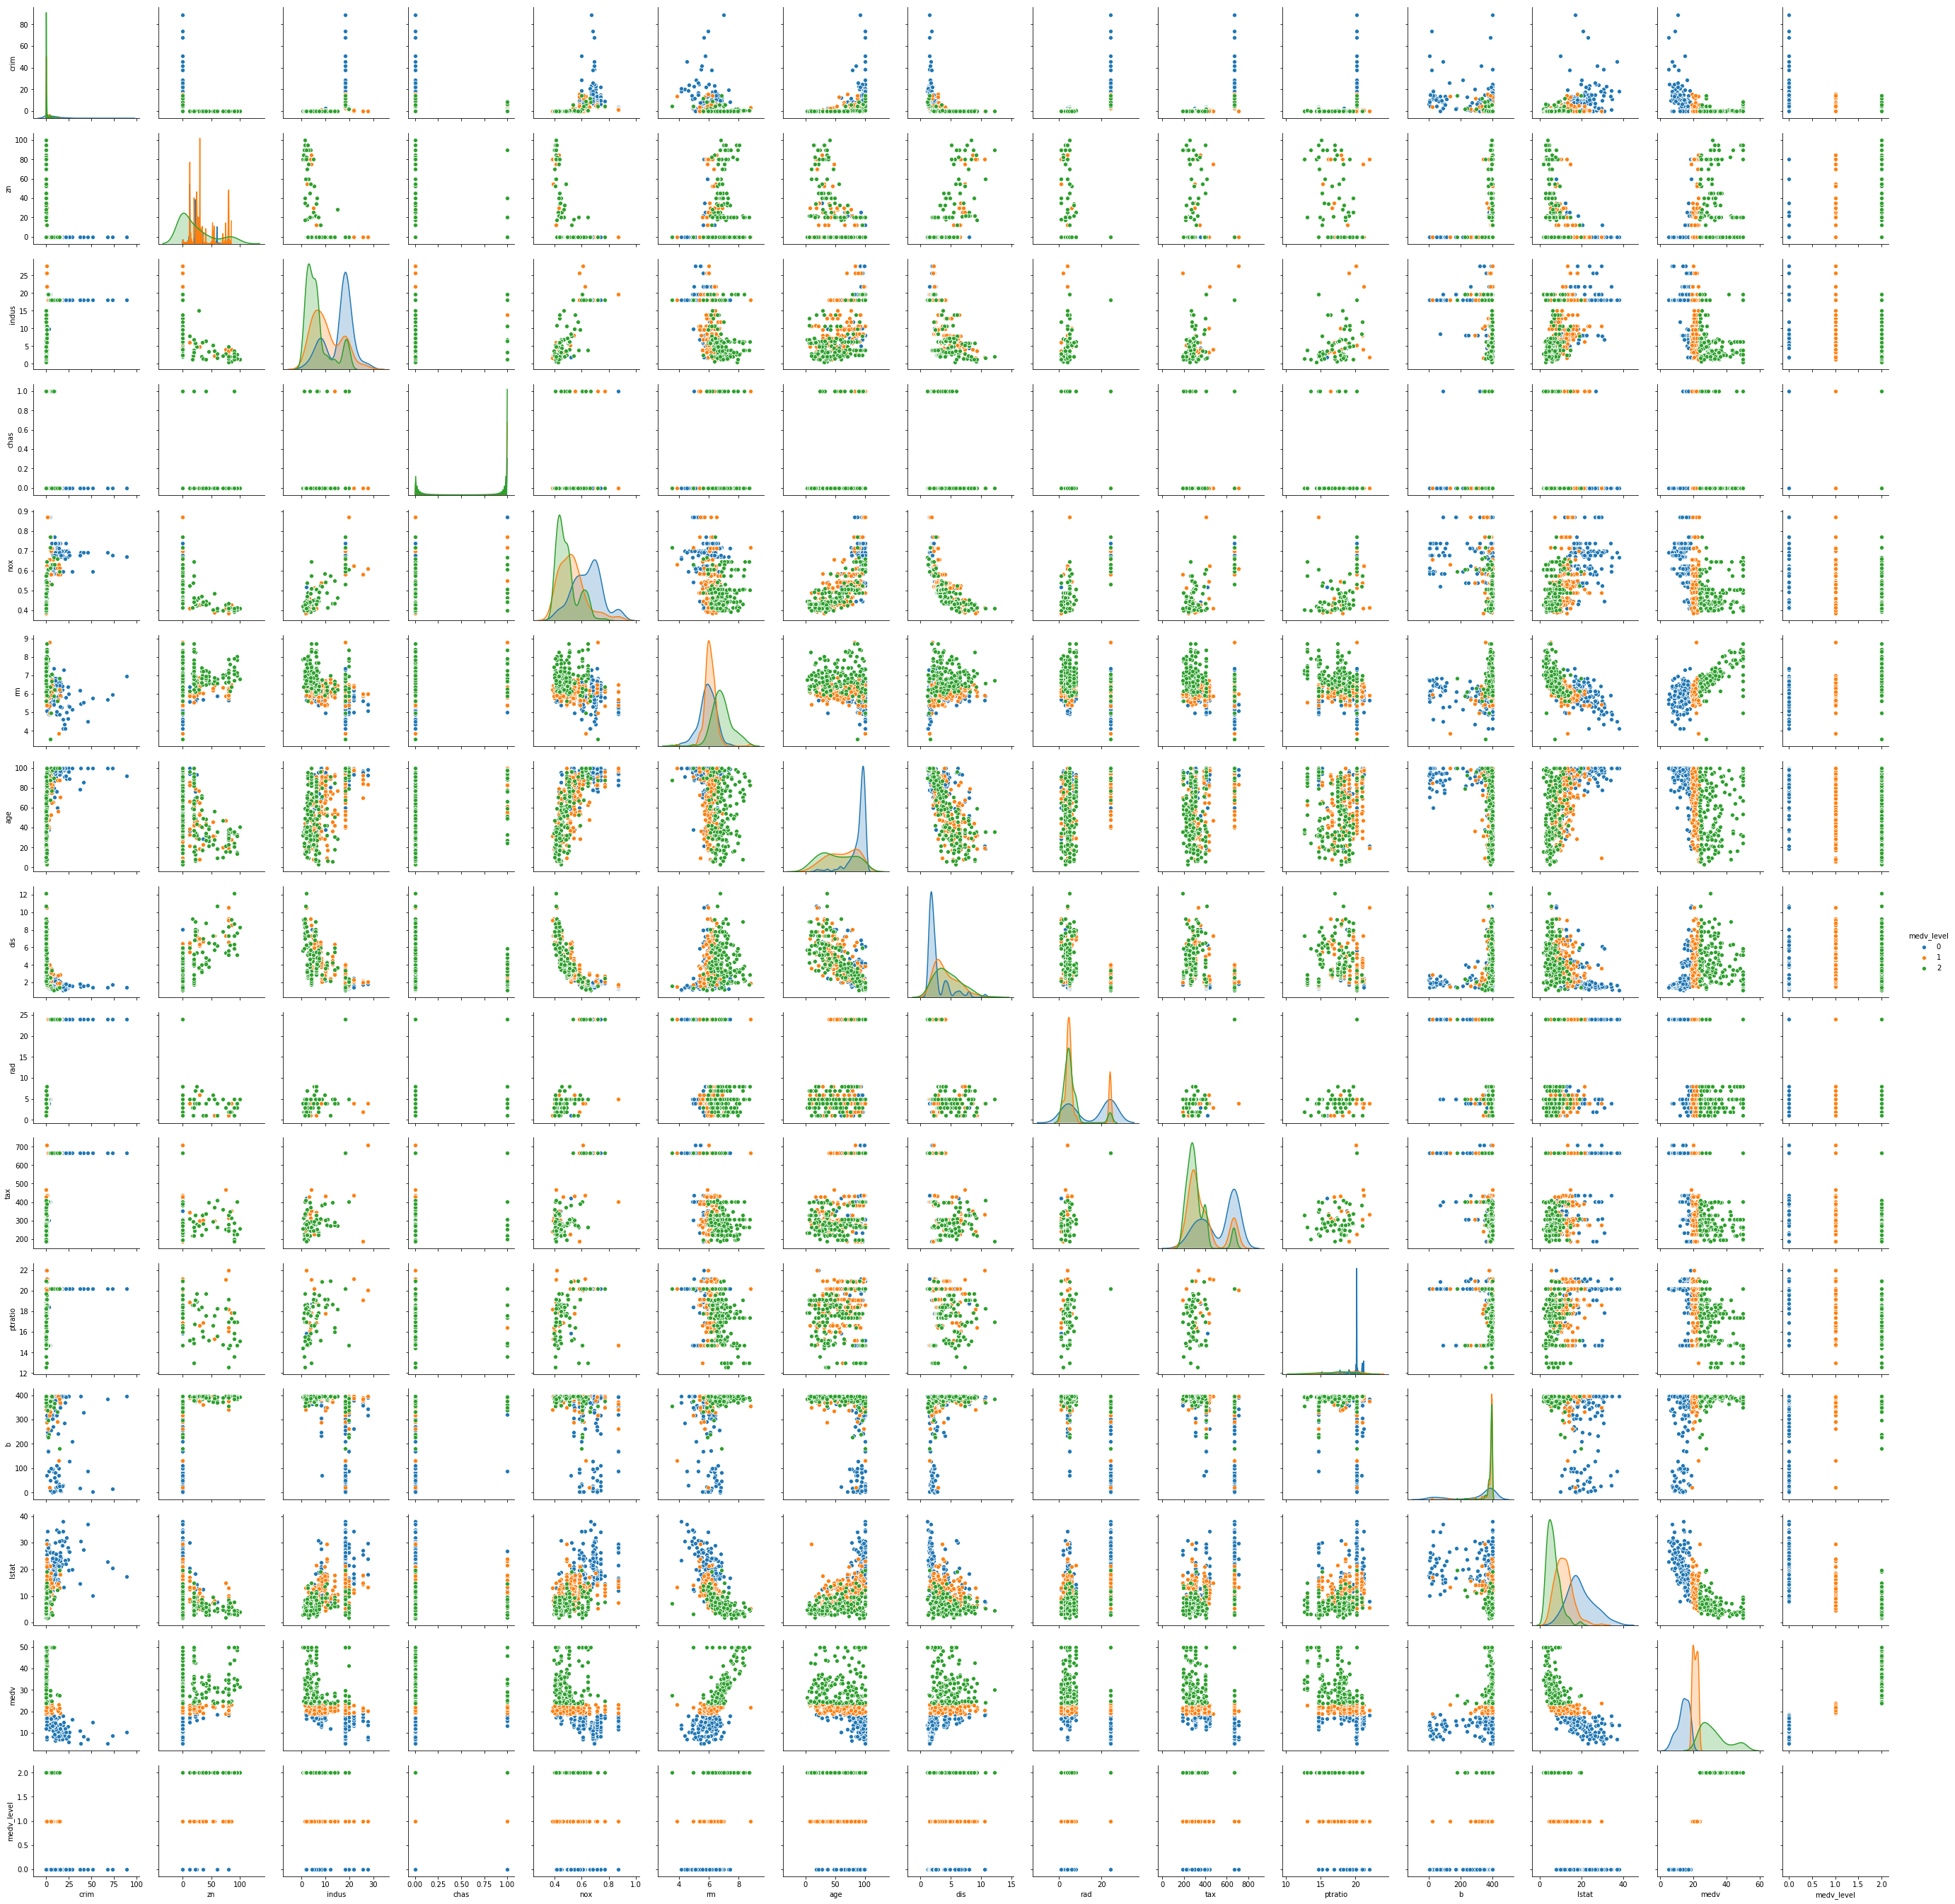

In [38]:
sns.pairplot(df, hue='medv_level')

In [43]:
# lstat and medv negative correlation

In [39]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,medv_level
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.381672
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.379056
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.549242
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.107283
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.535392
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.559745
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.523519
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.361854
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.424248
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.516053


In [44]:
# easier to interpret visually

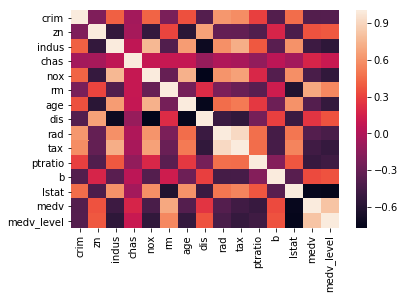

In [40]:
sns.heatmap(df.corr(), 
         xticklabels=df.corr().columns, 
         yticklabels=df.corr().columns)

In [45]:
'''
light = positive correlation
dark = negative correlation
The correlation coefficient ranges from -1 to 1. 
If the value is close to 1, it means that there is a strong positive correlation 
between the two variables. 
When it is close to -1, the variables have a strong negative correlation.
'''

'\nlight = positive correlation\ndark = negative correlation\nThe correlation coefficient ranges from -1 to 1. \nIf the value is close to 1, it means that there is a strong positive correlation \nbetween the two variables. \nWhen it is close to -1, the variables have a strong negative correlation.\n'

In [46]:
# what is the darkest and lightest
df[['rm','lstat']]

,rm,lstat
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33
5,6.430,5.21
6,6.012,12.43
7,6.172,19.15
8,5.631,29.93
9,6.004,17.10


# Machine Learning

## Linear Regression

In [165]:
#X = df[['rm','lstat']]
X = df[['rm']]
y = df['medv']

An independent variable, sometimes called an predictor variable, is a variable that is being manipulated in an experiment in order to observe the effect on a dependent variable, sometimes called an outcome variable.

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

The training set contains a known output and the model learns on this data in order to be generalized to other data later on.

Overfitting means that model we trained has trained “too well” and is now, well, fit too closely to the training dataset. This model will be very accurate on the training data but will probably be very not accurate on untrained or new data

In [191]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 2)
(404,)
(102, 2)
(102,)


In [167]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

fitting means making your algorithm learn the relationship between predictors (independent aka X) and outcome (dependent aka y aka target) so that you can predict the future values of the outcome

In [168]:
predictions = model.predict(X_test)
predictions

array([21.16191418, 31.43001615, 26.18891656, 22.09537799, 19.74887262,
       22.12106966, 19.55190319, 21.61580025, 25.57231661, 21.41883082,
       19.56903097, 32.63752438, 22.14676132, 20.26270591, 29.4260663 ,
       30.0084107 , 25.28114441, 19.29498655, 16.90566173, 20.31408924,
       23.397089  , 18.78971714, 25.99194713, 11.78445658, 12.41818431,
       20.35690868, 35.61775748, 25.02422776, 24.55321391, 33.20274101,
       26.41157765, 14.96165911, 23.66256954, 36.65398796, 21.40170305,
       18.96099491, 24.35624448, 21.00776419, 24.57890557, 23.43990844,
       19.21791155, 16.79433119, 25.1441222 , 17.69353945, 27.49919146,
       18.93530324, 18.0189672 , 30.27389124, 32.7745466 , 25.10986664,
       23.87666674, 35.86611024, 24.31342504, 11.93004268, 30.01697459,
        4.23967106, 30.33383845, 25.5808805 , 29.66585517, 22.6691585 ,
       16.16916735, 16.41752011, 22.77192516, 23.64544176, 24.13358339,
       22.33516686, 19.53477542, 23.51698344, 10.59407612, 22.25

In [187]:
# R-squared
# How Well Does the Model Fit the data?
model.score(X_train,y_train)

0.6383621213305268

In [170]:
'''
statistical measure of how close the data are to the fitted regression line

 percentage of the dependent (Y) variable variation that is explained by a linear model
 
 R-squared is always between 0 and 100%

0% indicates that the model explains none of the variability of the medv around its mean.
100% indicates that the model explains all the variability of the medv around its mean.

proposed model does not improve prediction over the mean model, and one indicating perfect prediction
'''

'\nstatistical measure of how close the data are to the fitted regression line\n\n percentage of the dependent (Y) variable variation that is explained by a linear model\n \n R-squared is always between 0 and 100%\n\n0% indicates that the model explains none of the variability of the medv around its mean.\n100% indicates that the model explains all the variability of the medv around its mean.\n\nproposed model does not improve prediction over the mean model, and one indicating perfect prediction\n'

In [171]:
rmse = sqrt(mean_squared_error(y_test, predictions))
rmse

6.617757209747954

In [172]:
'''
Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. R2 range is 0-1.
Lower values of RMSE indicate better fit.
RMSE good if comparing different models
'''

'\nWhereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. R2 range is 0-1.\nLower values of RMSE indicate better fit.\nRMSE good if comparing different models\n'

In [173]:
# coefficients
model.coef_

array([8.56388821])

In [174]:
X.columns

Index(['rm'], dtype='object')

In [175]:
# pair the feature names with the coefficients
pd.DataFrame([model.coef_], columns = X.columns, index=['Coef']).T

,Coef
rm,8.563888


In [176]:
'''
The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable the dependent variable. 
A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. 
A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant. This property of holding the other variables constant is crucial because it allows you to assess the effect of each variable in isolation from the others.
'''

'\nThe sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable the dependent variable. \nA positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. \nA negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.\n\nThe coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant. This property of holding the other variables constant is crucial because it allows you to assess the effect of each variable in isolation from the others.\n'

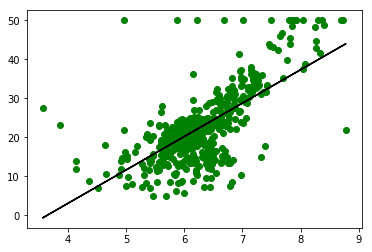

In [178]:
plt.scatter(X, y,color='g')
plt.plot(X, model.predict(X),color='k')

plt.show()

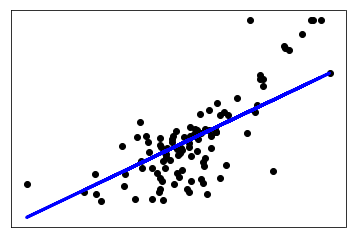

In [179]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, predictions, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Multiple Linear Regression

In [180]:
X = df[['rm','lstat']]
y = df['medv']

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [182]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [183]:
predictions = model.predict(X_test)
predictions

array([19.75541318, 12.08756244, 16.67462828, 20.05189699, 18.03400239,
       19.6723141 ,  9.61796205, 19.65027665,  5.85082141, 35.59144365,
       35.19580244, 23.69776638, 30.24144903, 24.93280497, 24.09448204,
       25.28751196, 18.33046395, 22.1439077 , 18.95210578, 22.57561375,
       23.81856713, 20.35191218, 21.38238992, 10.85069941, 19.12100265,
       19.46506421, 22.97522831, 20.81879913, 25.50280381, 26.44404135,
       21.6625514 , 26.5850551 , 21.21022568,  9.81583826, 20.020276  ,
       17.99693321, 24.33381084, 17.81837978, 21.01857957, 13.07884773,
       29.91239696, 25.97219895, 37.6202854 , 24.63812047, 19.33955269,
       18.37880137, 20.79760742, 21.54994204, 23.37999222, 21.3129401 ,
       29.2738477 , 20.14270101, 30.94061457, 21.82911803, 25.28261356,
       18.72772941, 15.5359976 , 30.72363802, 27.44365148, 13.44137086,
       28.65725658, 20.19758331, 21.84396552, 26.30135257, 35.97596603,
       39.85786784, 19.59366516, 27.73997959, 13.5790597 , 20.62

In [184]:
# R-squared
model.score(X_train,y_train)

0.6383621213305268

In [185]:
# Root mean squared error
rmse = sqrt(mean_squared_error(y_test, predictions))
rmse

5.403214489725109

In [186]:
# pair the feature names with the coefficients
pd.DataFrame([model.coef_], columns = X.columns, index=['Coef']).T

,Coef
rm,5.060383
lstat,-0.637952
